Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Rotation d'un corps solide

Pour décrire le mouvement de rotation d'un solide autour d'un point "origine" $O$, on défini un système de coordonnées *fixe* (celui du laboratoire, $XYZ$), et un repère attaché au solide, qu'on désigne comme le repère *mobile* $(xyz$).

Pour passer du repère fixe au mobile (ou vice versa) on n'a besoin que de trois rotations, par exemple paramétrées par les angles $(\phi,\theta,\psi)$ d'Euler.

Quant à son mouvement, le solide, de masse $M$, est caractérise par son centre de masse $\bm R_M$ et son moment d'inertie $I^G$ (rapporté à son centre de masse). Sa rotation est décrite par le vecteur de vitesse angulaire $\bm \Omega$. L'énergie cinétique du solide ne dépend que de ces paramètres. 

Le moment cinétique $\bm L$ est la somme du moment cinétique du mouvement du centre de masse et de la rotation:
$$\bm L = M \bm R_M \wedge \dot{\bm R}_M + \bm \Omega \wedge \bm L$$
(Dans le repère mobile, le premier terme s'annule.) Le moment cinétiques est proportionnel a la vitesse angulaire:
$$L = I\bm \Omega$$
où le coefficient de proportionnalité est le moment d'inertie (qui est une matrice  $3\times3$).

La *dynamique* est régie par l'équation de Newton, qui tient compte de forces appliquées $\bm F$, 
$$M\frac{\D^2 \bm R_M}{\D t^2} = F,$$
et par l'équation d'Euler, qui relie la variation du moment cinétique aux couples $\bm K$ appliqués:
$$\frac{\D \bm L}{\D t}\Big|_{XYZ} = \frac{\D \bm L}{\D t}\Big|_{xyz} + \bm \Omega \wedge \bm L\Big|_{xyz} = \bm K$$
où on calcule la partie droite de l'équation dans le repère mobile.

### Méthode de résolution des problèmes

Cinématique:
* Définir les repères et la géométrie du système solide 
* Calculer la matrice de passage $R$ (ou de changement de coordonnées $R^T=C$)
* Calculer le centre de masse et ses dérivées, sa vitesse et son accélération
* Calculer, dans le repère mobile, la matrice d'inertie
* Calculer la vitesse angulaire dans le repère mobile
* Calculer le moment cinétique dans le repère mobile

Dynamique:
* Écrire l'équation de Newton
* Écrire l'équation d'Euler

Pour un système compliqué (plusieurs axes de rotation d'un système articulé) il est nécessaire de faire plusieurs transformations de coordonnées, dans ce cas il est possible d'utiliser la formule transformation du moment d'inertie
$$I = RI^G R^T$$
ou $R$ est la matrice de passage.


# Imports

In [2]:
# numpy
import numpy as np

In [3]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt

In [4]:
%matplotlib inline

In [5]:
# sympy
import sympy as sy
from sympy import symbols
from sympy import simplify, expand, collect, cancel, apart, trigsimp
from sympy import integrate, diff, series
sy.init_printing(use_unicode = True)

# Centre de masse

Pour un ensemble de $N$ particules de masse $m_n$ la défintion de $\bm R$ est:
$$\sum_{n = 1}^N m_n (\bm r_n - \bm R) = 0$$
où $\bm r_n$ sont les positions:
$$\bm R = \frac{1}{M}\sum_{n = 1}^N m_n \bm r_n, \quad M = \sum_{n = 1}^N m_n$$

Pour une distribution de masse continue de densité $\rho(\bm r)$, la formule équivalente est
$$ \bm R = \frac{1}{M}\int_V \D \bm r\, \bm r \rho(\bm r), \quad  M = \int_V \D \bm r\, \rho(\bm r)$$
avec $V$ le volume du corps.

# Aire et volume

L'élément $\D V$ d'un volume $V$ défini par les formules paramétriques
$$x = x(u, v, w), \; y = y(u, v, w), \; z = z(u, v, w)$$
est,
$$\D V = \D x \D y \D z= J \D u \D v \D w$$
avec le jacobien,
$$J = \begin{vmatrix} 
\frac{\partial x}{\partial u} & \frac{\partial x}{\partial v} & \frac{\partial x}{\partial w} \\ 
\frac{\partial y}{\partial u} & \frac{\partial y}{\partial v} & \frac{\partial y}{\partial w} \\
\frac{\partial z}{\partial u} & \frac{\partial z}{\partial v} & \frac{\partial z}{\partial w} 
\end{vmatrix}$$

On obtient l'élément d'aire $\D A$ d'une façon équivalente:
$$dA = \D x \D y = J \D u \D v, \quad J = \left| \frac{\partial \bm r}{\partial u} \times \frac{\partial \bm r}{\partial v} \right|$$
où $\bm r = (x(u,v), y(u,v), z(u,v))$.

### Surface, forme explicite

Soit $\bm r = (x, y, f(x,y)$ (les deux paramètres sont les coordonnées $(x,y)$):
$$A = \int_S \D x \D y\, \left| (1,0,f_x) \times (0,1,f_y) \right|  = \int_S \D x \D y\, \sqrt{1 + f_x^2 + f_y^2}$$ 


# Moment d'inertie

On consirère un corps de densité $\rho = \rho(\bm r$, en général non homogène, de volume $V$. Le moment d'inertie est construit sur les moments d'ordre deux de la densité:
$$I_{ij} = \int_V \D \bm r \, (r^2 \delta_{i,j} - x_i x_j) \rho(\bm r)$$
avec $i,j = 1, 2, 3$ correspondant aux coordonnées $\bm r = (x, y, z)$.

On peut représenter le moment d'inertie par une matrice:
$$I = \int_V \D \bm r \, \rho \begin{pmatrix} y^2 + z^2 & -xy & -xz \\  -yx & x^2 + z^2 & -yz \\  -zx & -zy & x^2 + y^2 \end{pmatrix}$$

Un transformation de coordonnées permet de rendre la matrice diagonale. Les éléments de la diagonale:
$$I = \mathrm{diag}(I_x, I_y, I_z)$$
sont les moments "principaux" d'inertie.

## Choix des coordonnées

L'avantage d'écrire $I$ comme un tenseur c'est qu'on peut calculer ses élément dans n'importe quelle base. Cependant le calcul de $I_{ij}$ est grandement simplifié si on choisi un système de coordonnées qui respecte les symétries de l'objet.

Si on note $I^G$ le tenseur d'inertie calculé sur le centre de masse, le tenseur $I$ calculé sur un point $\bm d = (d_x, d_y, d_z)$, avec $d$ la distance du nouvel origine au centre de masse, on a la formule de changement de coordonnées:
$$I_{ij} = I^G_{ij} + M(d^2 \delta_{ij} - d_id_j)$$

Dans le cas d'une rotation $R_{\bm n}(\varphi)$ du solide autour de centre de masse, la matrice $I^G$ change selon la formule:
$$I = R_{\bm n}(\varphi) I^G R_{\bm n}(\varphi)^T$$

Considérons un exemple. Un carré de côté $a$, avec l'origine en $(0,0)$ et en $(a/2,0)$:

## Axes principaux

Comme le tenseur d'inertie est symétrique, on peut toujours diagonaliser sa matrice, et donc l'ecrire comme
$$I = \mathrm{diag}(I_x, I_y, I_z)$$
Les trois valeurs de la diagonale sont les racines du polynôme caractéristique:
$$P(\lambda) = \det\left(I - \lambda 1_3\right) = 0$$
($1_3$ est la matrice identité de dimension 3); les vecteurs propres de la transformation sont les axes principaux du corps. Ils coincident avec les axes de symétrie du corps, si la densité est uniforme.

# Cinématique du solide

## Vitesse angulaire

Dans un repère fixe $(X,Y,Z)$ un point $\bm X$ du solide $\mathcal{V}$ varie selon le mouvement du centre de masse $\bm R$ et de sa propre rotation d'angle $\varphi$ et d'axe $\bm n$, $\D \bm \varphi = \bm n \D \varphi$:
$$\D \bm X = \D \bm R + \D \bm \varphi \times \bm r$$
où $\bm r$ est un point appartenant à $\mathcal{V}$, mesuré dans le repère $(x,y,z)$ d'origine $O$ (le centre de masse) fixé au solide: $\bm X = \bm R + \bm r$ à chaque instant $t$.

Les coordonnées $(X,Y,Z)$ sont fixes, tandis que les coordonnées $(x,y,z)$ évoluent dans le temps:
$$\frac{\D \bm X}{\D t} = \bm v, \; \frac{\D \bm R}{\D t} = \bm V, \; \frac{\D \bm a}{\D t} = \bm \Omega$$
On a donc la transformation de la vitesse entre le repère fixe $\bm v$ et le mouvement du corps:
$$\bm v = \bm V + \bm \Omega \times \bm r$$
Le vecteur $\bm r$ ne dépend pas du temps puisqu'il est un point d'un corps solide (indéformable).

Si l'origine de coordonnées du corps n'est pas sur son centre de masse, mais il est déplacé de $\bm d$, on a la transformation suivante:
$$\bm v = \bm V + \bm \Omega \times \bm d + \bm \Omega \times \bm r'$$
avec $\bm r = \bm r' + \bm d$,
$$\bm V' = \bm V + \bm \Omega \times \bm d, \; \bm \Omega' = \bm \Omega$$
le centre de masse tourne, mais la vitesse angulaire du corps est invariante.

## Énergie cinétique

Elle est donnée par la formule habituelle
$$T = \frac{1}{2} \sum_n m_n \bm v_n^2$$
En y substituant l'expression de $\bm v$ on obtient:
$$T = \frac{1}{2} \sum_n m_n \bm V^2 + \sum_n m_n \bm \Omega \times \bm r_n + \frac{1}{2} \sum_n m_n \left( \Omega \times \bm r_n \right)^2$$
On note que le terme du milieu est nul, par définition du centre de masse, on a donc:
$$T = \frac{M V^2}{2} + \frac{1}{2} \sum_n m_n \left( \Omega \times \bm r_n \right)^2=  \frac{M V^2}{2} +  \frac{1}{2} \sum_n m_n (\Omega_l^2 x_{nl}^2 - \Omega_i x_{ni} \Omega_j x_{nj})$$
où nous avons introduit la notation en coordonnées (avec la convention que l'on fait la somme sur les indices répétés). En notant que $\Omega_l^2 x_l^2 = \Omega_i \Omega_j \delta_{ij} x_l^2$, on peut écrire:
$$T = \frac{M V^2}{2} + \frac{1}{2} \sum_n m_n (x_{nl}^2 \delta_{ij} - x_{ni} x_{nj}) \Omega_i \Omega_j$$
On trouve donc
$$T = \frac{M V^2}{2} + \frac{1}{2} I_{ij} \Omega_i \Omega_j$$
avec 
$$I_{ij} =  \sum_n m_n (x_{nl}^2 \delta_{ij} - x_{ni} x_{nj})$$
le tenseur d'inertie.

### Angles d'Euler

Les angles d'Euler sont définis par la matrice de rotation entre le repère fixe $(\bm e_X, \bm e_Y, \bm e_Z)$ et le repère du corps (mobile)  $(\bm e_x, \bm e_y, \bm e_z)$:
* Rotation d'angle $\phi$ et d'axe $Z$: $(XYZ) \rightarrow (Ny_1Z)$
\begin{align}
\bm e_N &= R_Z(\phi) \bm e_X \\
\bm e_{y_1} &= R_Z(\phi) \bm e_Y
\end{align}

* Rotation d'angle $\theta$ et d'axe $N$: $(Ny_1Z) \rightarrow (Ny_2z)$
\begin{align}
\bm e_{y_2} &= R_N(\theta) \bm e_{y_1} \\
\bm e_z &= R_N(\theta) \bm e_Z
\end{align}

* Rotation d'angle $\psi$ et d'axe $z$: $(Ny_2z) \rightarrow (xyz)$
\begin{align}
\bm e_x &= R_z(\psi) \bm e_N \\
\bm e_y &= R_z(\psi) \bm e_{y_2}
\end{align}

La composition de trois rotations s'écrit
\begin{align}
\bm e_x &= R_z(\psi)R_x(\theta)R_z(\phi) \bm e_X \\
\bm e_y &= R_z(\psi)R_x(\theta)R_z(\phi) \bm e_Y \\
\bm e_z &= R_z(\psi)R_x(\theta) \bm e_Z
\end{align}
ou aussi comme:
$$ \begin{pmatrix} \bm e_x & \bm e_y & \bm e_z \end{pmatrix} = \begin{pmatrix} \bm e_X & \bm e_Y & \bm e_Z \end{pmatrix} R(\phi,\theta,\psi) ,$$
avec,
$$R(\phi,\theta,\psi) = R_Z(\phi) R_X(\theta) R_Z(\psi),$$
soit
$$R(\phi, \theta, \psi)=\begin{pmatrix}- \cos\theta  \sin\psi \sin\phi + \cos\psi \cos\phi & -\cos\theta \sin\psi \cos\phi - \cos\psi \sin\phi & \sin\theta \sin\psi \\ \cos\theta \cos\psi \sin\phi + \sin\psi \cos\phi & \cos\theta \cos\psi \cos\phi - \sin\psi \sin\phi & - \sin\theta \cos\psi \\ \sin\theta \sin\phi & \sin\theta \cos\phi & \cos\theta \end{pmatrix}$$
Les **colonnes** de cette matrice sont les vecteurs du repère mobile.

Si les coordonnées d'un vecteur dans le repère mobile sont $(x,y,z)$, dans le repère fixe elles sont données par:
$$\begin{pmatrix} x \\ y \\ z \end{pmatrix} = C(\phi,\theta, \psi) \begin{pmatrix} X \\ Y \\ Z \end{pmatrix},$$
où 
$$C = R^T = C_z(\psi) C_x(\theta) C_z(\phi)$$
est la matrice de changement de coordonnées (transposée de la rotation d'Euler).

## Vitesse angulaire en fonction des angles d'Euler

Dans le repère du centre de masse $(x,y,z)$:
\begin{align*}
\Omega_x &= \dot{\psi} \sin \theta \sin \varphi + \dot{\theta} \cos \varphi \\
\Omega_y &= \dot{\psi} \sin \theta \cos \varphi - \dot{\theta} \sin \varphi \\
\Omega_z &= \dot{\psi} \cos \theta + \dot{\varphi}
\end{align*}

In [6]:
phi, theta, psi = symbols("phi, theta, psi", real=True)

def R_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, -s],
                  [0, s,  c]])
def R_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, s],
                  [ 0, 1, 0],
                  [-s, 0, c]])

def R_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, -s, 0],
                  [s,  c, 0],
                  [0,  0, 1]])

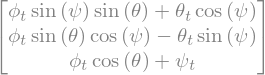

In [36]:
# d phi/d t est dirigé selon ez(mobile)
# d theta/d t est dirigé selon la ligne nodale eN
# d psi/d t est dirigé selon eZ (fixe)
psi_t, theta_t, phi_t = sy.symbols("psi_t, theta_t, phi_t", real=True)
#
ex = sy.Matrix([1,0,0])
ey = sy.Matrix([0,1,0])
ez = sy.Matrix([0,0,1])

eZ = R_z(-psi)*R_x(-theta)*ez
eN = R_z(-psi)*ex
Omega = psi_t*ez + theta_t*eN + phi_t*eZ
Omega

### Équation d'Euler de changement de repère

La variation d'un vector quelconque $\bm A$ se décompose dans une partie de variation intrinsèque (dans le repère mobile) qu'on note avec une prime, et une autre partie due à la rotation de vitesse angulaire $\bm \Omega$:
$$\frac{\D \bm A}{\D t} = \frac{\D' \bm A}{\D t} + \Omega \times \bm A$$
On peut aussi noter explicitement les repères:
$$\left. \frac{\D \bm A}{\D t} \right|_{(X,Y,Z)} = \left. \frac{\D \bm A}{\D t} \right|_{(x,y,x)} + \left. \Omega \times \bm A \right|_{(x,y,z)}$$

## Moment cinétique

Pour un ensemble de points matériels le moment cinétique (ou moment angulaire) $\bm L$:
$$\bm L = \sum_n m_n \bm r_n \times \bm v_n$$
Un changement du centre de coordonnées par une translation $\bm d$, $\bm r = \bm r' + \bm d$ transforme le moment 
$$\bm L = \sum_n (\bm r'_n \times \bm p_n + \bm d \times \bm p_n) = \bm L' + \bm d \times \bm P$$
Si deux systèmes ont une vitesse relative $\bm V$: $\bm v_n = \bm v'_n + \bm V$, le moment cinétique change selon la loi:
$$\bm L = \bm L' + M \bm R \times V$$

### Solide

La généralisation à un corps solide consiste à remplacer la vitesse des particules par la vitesse angulaire du solide $\bm \Omega \times \bm r$:
$$L_i = I_{ij} \Omega_j$$
(toujours on somme sur les indices répétés).
Notez:
$$\bm r \times (\bm \Omega \times \bm r) = \bm \Omega r^2 - \bm r (\Omega \cdot \bm r)$$
ce qui s'écrit comme le produit du tenseur d'inertie par le vecteur de vitesse angulaire. 

Il convient de faire un changement de coordonnées pour exprimer le tenseur d'inertie selon ses axes principales:
$$ L_x = I_x \Omega_x,\; L_y = I_y \Omega_y, \; L_z = I_z \Omega_z$$

### Variation de $\bm L$: Équations d'Euler

La variation "instantanée" du moment $\bm L$ est donnée par la formule générale, applicable à tout vecteur:
$$\left. \frac{\D \bm L}{\D t} \right|_{(X,Y,Z)} = \left. \frac{\D \bm L}{\D t} \right|_{(x,y,x)} + \left. \Omega \times \bm L \right|_{(x,y,z)}$$
où $(X,Y,Z)$ est le repère fixe, et $(x,y,z)$ le repére fixé au solide, mobile par rapport à $(X,Y,Z)$.

Dans le cas où le tenseur $I$ est diagonal, on a
\begin{align*}
\dot{L}_x &= I_x \frac{\D \Omega_x}{\D t} + (I_z-I_y)\Omega_y \Omega_z \\
\dot{L}_y &= I_y \frac{\D \Omega_y}{\D t} + (I_x-I_z)\Omega_x \Omega_z \\
\dot{L}_z &= I_z \frac{\D \Omega_z}{\D t} + (I_y-I_x)\Omega_x \Omega_y \\
\end{align*}

In [27]:
ox, oy, oz = sy.symbols("Omega_x, Omega_y, Omega_z")
oxt, oyt, ozt = sy.symbols("\dot\Omega_x, \dot\Omega_y, \dot\Omega_z")
Ix, Iy, Iz, Ig = sy.symbols("I_x, I_y, I_z, I^G")

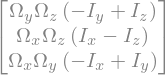

In [32]:
O = sy.Matrix([[ox],[oy],[oz]])
Ig = sy.Matrix([[Ix,0,0],[0,Iy,0],[0,0,Iz]])
L = Ig*O
oL = sy.simplify( O.cross(L) )
oL

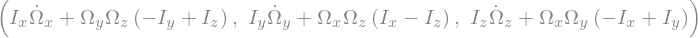

In [33]:
Ix*oxt + oL[0], Iy*oyt + oL[1], Iz*ozt + oL[2]

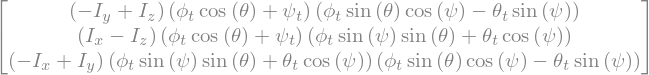

In [39]:
LO = Ig*Omega
oLO = sy.simplify( Omega.cross(LO) )
oLO

# Brouillon

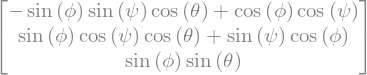

In [43]:
R_z(psi)*R_x(theta)*R_z(phi)*ex

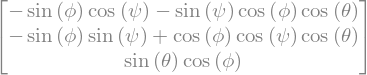

In [44]:
R_z(psi)*R_x(theta)*R_z(phi)*ey

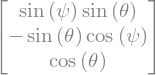

In [45]:
R_z(psi)*R_x(theta)*ez

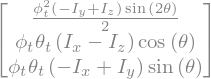

In [40]:
sy.simplify( oLO.subs([(psi_t,0),(psi,0)]) )